# Feature Selection
Feature selection is the process of identifying and selecting the most relevant features (input variables) from a dataset to use in building a predictive model. It involves removing irrelevant, redundant, or noisy features that do not contribute significantly to the prediction task.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Read the data 

In [2]:
wine_data = load_wine()

wine_df = pd.DataFrame(
    data=wine_data.data,
    columns=wine_data.feature_names
)

wine_df['target'] = wine_data.target

wine_df.sample(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.600000,1.05,2.65,450.0,1
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.270000,1.25,1.67,680.0,1
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.580000,0.87,2.11,570.0,2
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.100000,0.91,3.33,985.0,0
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.740000,1.07,3.21,625.0,1


c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


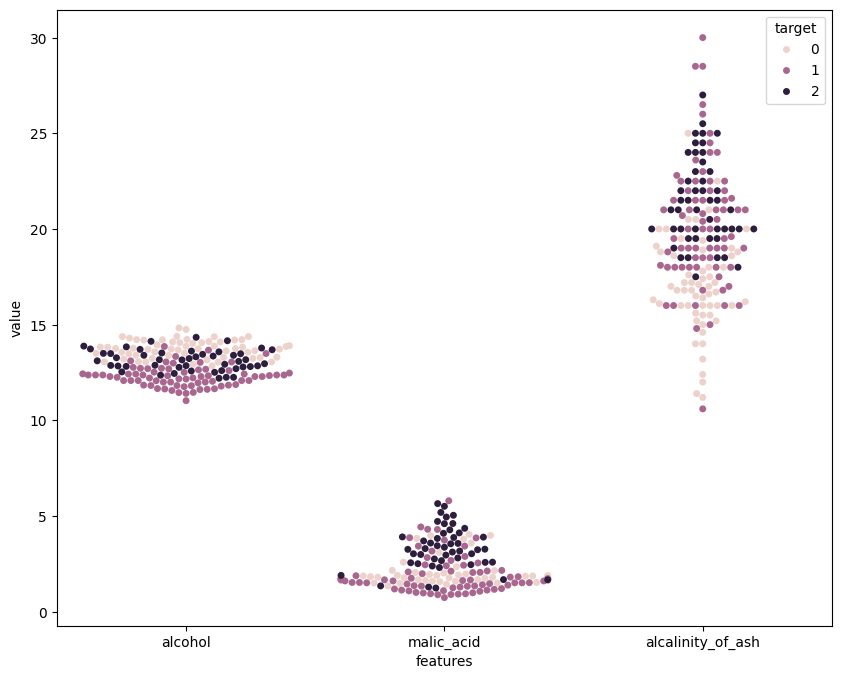

In [3]:
from seaborn import swarmplot

data_to_plot = pd.melt(wine_df[['alcohol', 'malic_acid', 'alcalinity_of_ash', 'target']],
                       id_vars='target',
                       var_name='features',
                       value_name='value')

fig, ax = plt.subplots(figsize=(10, 8)) 
swarmplot(data=data_to_plot, x='features', y='value', hue='target');

In [4]:
wine_df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

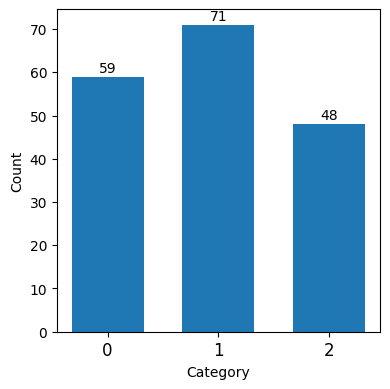

In [5]:
target_value_counts = wine_df['target'].value_counts().to_dict()
keys = list(target_value_counts.keys())
values = list(target_value_counts.values())

# Create the plot with a reduced figure size
fig, ax = plt.subplots(figsize=(4, 4))  

# Plot the bars with a reasonable width
ax.bar(keys, values, width=0.65)  
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticks(keys)
ax.set_xticklabels(keys, fontsize=12)

# Add text labels on top of the bars
for index, value in target_value_counts.items():
    plt.text(x=index, y=value+1, s=str(value), ha='center')

# Adjust layout
plt.tight_layout()

## Train/test split 

In [6]:
from sklearn.model_selection import train_test_split

X = wine_df.drop(['target'], axis=1)
y = wine_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


# Baseline model: Decision Tree with all features 

In [8]:
from sklearn.tree import DecisionTreeClassifier


# Initialize classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train classifier using all features
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = model.score(X_test, y_test)

print(accuracy)

0.9629629629629629


# Feature selection techniques

## Variance threshold

Objective: Remove features with low variance, as they provide little discriminatory power.

- Features with a variance below a set threshold are excluded.
- For example, if a feature has almost constant values across samples, it won't help differentiate the target classes.

Use Case: This is a simple, unsupervised method useful for initial pruning of irrelevant features.

In [9]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [10]:
# Calculate the variance of each feature
X_train_v1.var(axis=0)

alcohol                             0.658341
malic_acid                          1.123507
ash                                 0.072433
alcalinity_of_ash                  11.471279
magnesium                         232.071532
total_phenols                       0.393226
flavanoids                          0.912299
nonflavanoid_phenols                0.013873
proanthocyanins                     0.335108
color_intensity                     5.669722
hue                                 0.052891
od280/od315_of_diluted_wines        0.470021
proline                         94906.710923
dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

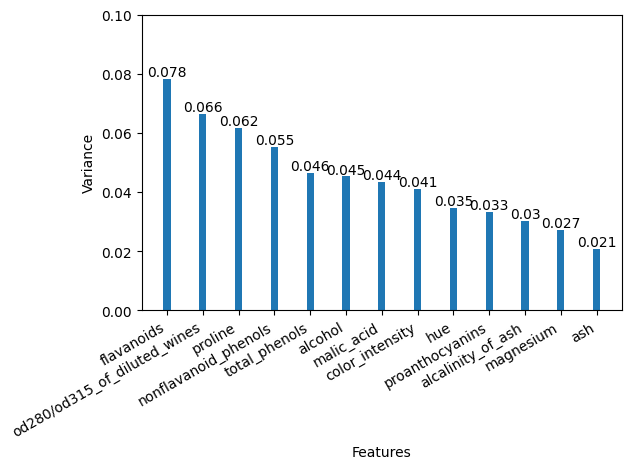

In [12]:
# Plot sorted variances
x = X.columns
y = scaled_X_train_v1.var(axis=0)

# Sort the features and variance values
sorted_indices = np.argsort(y)[::-1]  # Sorting in descending order
sorted_x = x[sorted_indices]          # Sorted feature names
sorted_y = y[sorted_indices]          # Sorted variances

# Create the plot
fig, ax = plt.subplots()

ax.bar(sorted_x, sorted_y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

# Add labels to the bars
for index, value in enumerate(sorted_y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')

# Auto format the x-axis labels to prevent overlap
fig.autofmt_xdate()
plt.tight_layout()

In [13]:
sel_X_train_v1 = X_train_v1.drop(['ash', 'magnesium'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['ash', 'magnesium'], axis=1)

model.fit(sel_X_train_v1, y_train)

var_preds = model.predict(sel_X_test_v1)

# Evaluate the model using accuracy
accuracy = model.score(sel_X_test_v1, y_test)

print(accuracy)

1.0


## *k*-best features 

Objective: Select the top 𝑘 features based on a scoring function.

- This technique evaluates each feature individually using a statistical measure (e.g., ANOVA F-statistic or chi-squared test) and selects the k-highest scoring ones.
- It ranks features based on their contribution to the target variable.

Use Case: Great for supervised feature selection when you want to retain the most informative features.

In [14]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

k_best_accuracy_list = []

for k in range(1, 14):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    model.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = model.predict(sel_X_test_v2)
    
    # Calculate accuracy instead of F1 score
    accuracy = model.score(sel_X_test_v2, y_test)
    
    k_best_accuracy_list.append(accuracy)

print(k_best_accuracy_list)

[0.7962962962962963, 0.8888888888888888, 0.9444444444444444, 1.0, 1.0, 0.9814814814814815, 0.9814814814814815, 1.0, 0.9814814814814815, 0.9259259259259259, 1.0, 0.9259259259259259, 0.9629629629629629]


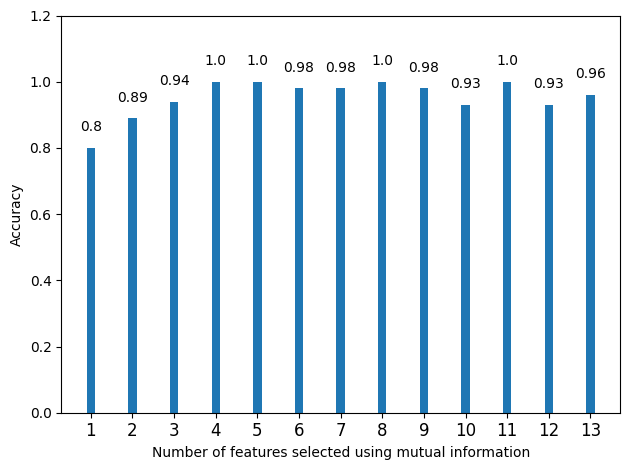

In [16]:
fig, ax = plt.subplots()

x = np.arange(1, 14)

# Rounding accuracy list values to 2 decimal places
y = accuracy_list = [round(acc, 2) for acc in k_best_accuracy_list]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [17]:
selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines',
       'proline'],
      dtype='object')

In [18]:
sel_X_train_v2 = selector.transform(X_train_v2)  # Transform the training set
sel_X_test_v2 = selector.transform(X_test_v2)    # Transform the test set


# Run the classifier 
model = DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(sel_X_train_v2, y_train_v2)
preds = model.predict(sel_X_test_v2)


# Evaluate the model using accuracy
accuracy = model.score(sel_X_test_v2, y_test)

print(accuracy)

1.0


## Recursive feature elimination (RFE) 
Objective: Recursively remove the least important features based on model performance.

- A model is trained on the dataset, and the importance of each feature is evaluated.
- The least important feature is removed, and the process is repeated until the desired number of features remains.

Use Case: Used when you want to refine the feature set iteratively, especially with algorithms like SVM or Random Forests.

In [19]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [20]:
from sklearn.feature_selection import RFE

rfe_accuracy_list = []

for k in range(1, 14):
    RFE_selector = RFE(estimator=model, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, y_train_v3)
    
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)
    
    model.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = model.predict(sel_X_test_v3)

    accuracy = model.score(sel_X_test_v3, y_test)
    rfe_accuracy_list.append(accuracy)

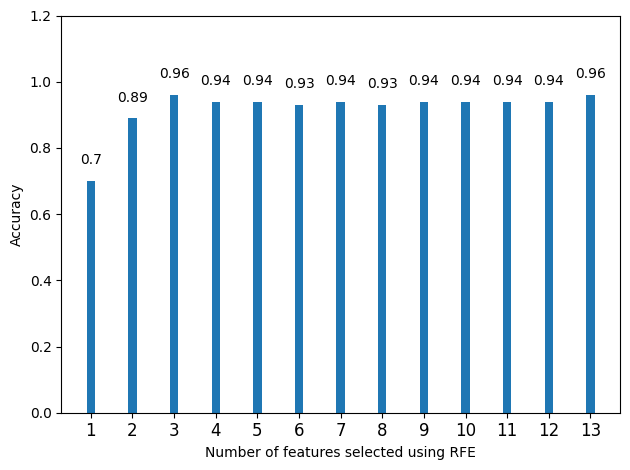

In [21]:
fig, ax = plt.subplots()

x = np.arange(1, 14)
# Rounding accuracy list values to 2 decimal places
y = [round(acc, 2) for acc in rfe_accuracy_list]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [22]:
RFE_selector = RFE(estimator=model, n_features_to_select=4, step=1)
RFE_selector.fit(X_train_v3, y_train_v3)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['alcalinity_of_ash', 'flavanoids', 'color_intensity', 'proline'], dtype='object')

In [23]:
sel_X_train_v3 = selector.transform(X_train_v3)  # Transform the training set
sel_X_test_v3 = selector.transform(X_test_v3)    # Transform the test set


# Run the classifier 
model = DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(sel_X_train_v3, y_train_v3)
preds = model.predict(sel_X_test_v3)


# Evaluate the model using accuracy
accuracy = model.score(sel_X_test_v3, y_test)

print(accuracy)

1.0


# Sequential feature elimination / selection
Objective: Add or remove features sequentially to find the optimal subset.

- Forward Selection: Start with no features, add one at a time based on performance improvement.
- Backward Elimination: Start with all features, remove one at a time based on performance degradation.
- Bidirectional: Combine both approaches to ensure an optimal balance.

Use Case: Effective for datasets with interdependent features or when you have a lot of features to test.

In [24]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_accuracy_list = []

for k in range(1, 13):
    SFS_selector = SequentialFeatureSelector(model, n_features_to_select=k, direction='backward') # try direction='forward'
    SFS_selector.fit(X_train_v4, y_train_v4)
    
    sel_X_train_v4 = SFS_selector.transform(X_train_v4)
    sel_X_test_v4 = SFS_selector.transform(X_test_v4)
    
    model.fit(sel_X_train_v4, y_train_v4)
    RFE_preds = model.predict(sel_X_test_v4)

    accuracy = model.score(sel_X_test_v4, y_test)
    sfs_accuracy_list.append(accuracy)

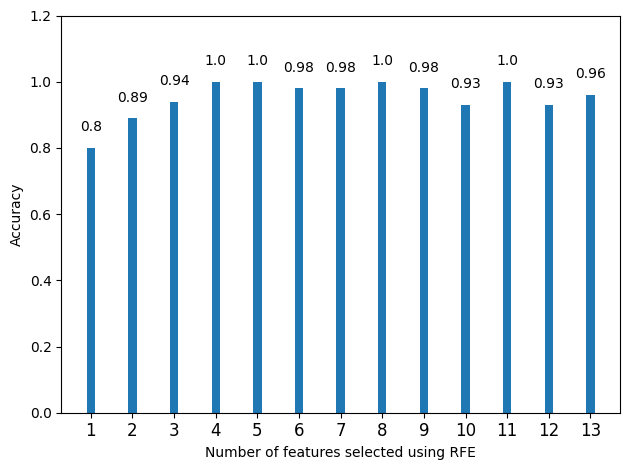

In [26]:
fig, ax = plt.subplots()

x = np.arange(1, 14)
# Rounding accuracy list values to 2 decimal places
y = [round(acc, 2) for acc in accuracy_list]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [27]:
sel_X_train_v4 = selector.transform(X_train_v4)  # Transform the training set
sel_X_test_v4 = selector.transform(X_test_v4)    # Transform the test set


# Run the classifier 
model = DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(sel_X_train_v4, y_train_v4)
preds = model.predict(sel_X_test_v4)


# Evaluate the model using accuracy
accuracy = model.score(sel_X_test_v4, y_test)

print(accuracy)

1.0
